# Understanding Data in Computing

This interactive notebook demonstrates concepts from "Understanding Data in Computing". Run cells to compute statistics and generate visualizations. The notebook uses `numpy`, `pandas`, and `matplotlib` (no seaborn) so it can run in a standard Python environment.

----

## 1. Introduction

Data are raw facts (numbers, text, images) which become information after organization and processing. We'll demonstrate structured vs unstructured data, quantitative vs qualitative data, variable types, central tendency, measures of spread, and common distributions.

## 2. Setup — imports and sample data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Make plots show inline in classic Jupyter
%matplotlib inline

print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('matplotlib:', plt.matplotlib.__version__)

numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.9.2


## 3. Structured vs Unstructured Data (example)

We'll create a small structured dataset (pandas DataFrame) and an unstructured dataset (list of text + images metadata).

In [11]:
# Structured data example: tabular customer records
customers = pd.DataFrame({
    'customer_id': [101, 102, 103, 104],
    'name': ['Aisha', 'Bilal', 'Chen', 'Dina'],
    'age': [28, 34, 22, 45],
    'purchase_count': [5, 2, 7, 1]
})

print('Structured data (DataFrame):')
display(customers)

Structured data (DataFrame):


,customer_id,name,age,purchase_count
0,101,Aisha,28,5
1,102,Bilal,34,2
2,103,Chen,22,7
3,104,Dina,45,1


In [12]:


# Unstructured data example: text + media metadata
unstructured = [
    'Email: Dear customer, thanks for joining!',
    'Chat message: I loved the product, but it arrived late.',
    {'image_filename': 'img_001.jpg', 'resolution': (1024,768)},
    'Transcript: Meeting started at 10:05am and ended at 11:20am.'
]

print('\nUnstructured data (examples):')
for item in unstructured:
    print('-', item)



Unstructured data (examples):
- Email: Dear customer, thanks for joining!
- Chat message: I loved the product, but it arrived late.
- {'image_filename': 'img_001.jpg', 'resolution': (1024, 768)}
- Transcript: Meeting started at 10:05am and ended at 11:20am.


### Quick observation

- Structured data: easy to query, compute, and aggregate.
- Unstructured data: needs parsing / NLP / vision methods to analyze.

## 4. Quantitative vs Qualitative Data

Examples and simple analyses.

In [13]:
temps = np.array([22.5, 23.0, 21.7, 24.1, 22.8, 23.3, 22.9]) 
type(temps)

numpy.ndarray

Temperatures: [22.5 23.  21.7 24.1 22.8 23.3 22.9]
Mean: 22.900000000000002
Median: 22.9
Std dev: 0.6782329983125274

Color counts: Counter({'blue': 3, 'red': 2, 'green': 1})


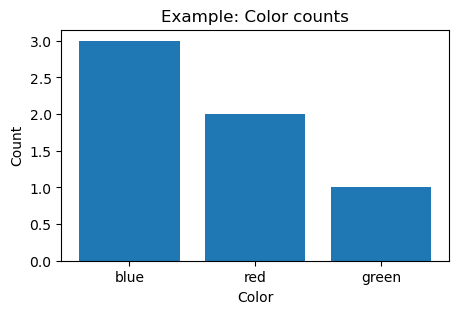

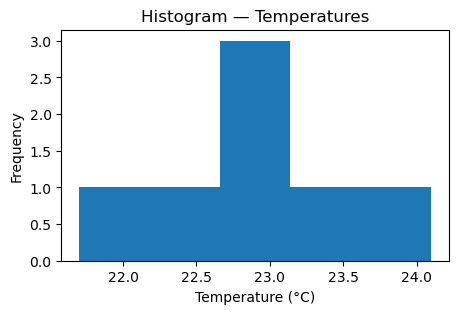

In [3]:
# Quantitative data example (numerical)
temps = np.array([22.5, 23.0, 21.7, 24.1, 22.8, 23.3, 22.9])  # degrees Celsius

print('Temperatures:', temps)
print('Mean:', temps.mean())
print('Median:', np.median(temps))
print('Std dev:', temps.std(ddof=0))

# Qualitative data example (categorical)
colors = ['blue', 'red', 'blue', 'green', 'red', 'blue']
counts = Counter(colors)
print('\nColor counts:', counts)

# Bar chart for categorical data
labels = list(counts.keys())
values = [counts[l] for l in labels]
plt.figure(figsize=(5,3))
plt.bar(labels, values)
plt.title('Example: Color counts')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

# Histogram for quantitative data
plt.figure(figsize=(5,3))
plt.hist(temps, bins=5)
plt.title('Histogram — Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

## 5. Numerical Variables: Continuous vs Discrete

Demonstrate continuous (height) and discrete (student counts) variables.

Heights (continuous): [170.2 165.  180.5 172.3 169.8 175. ]
Can be fractional; mean = 172.13333333333333

Students per section (discrete): [30 28 32 29 31]
Mean students: 30.0


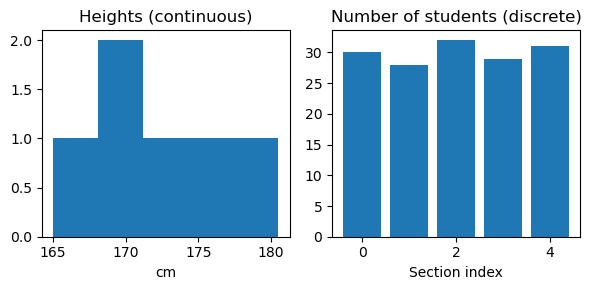

In [4]:
# Continuous variable example: heights (cm)
heights = np.array([170.2, 165.0, 180.5, 172.3, 169.8, 175.0])
print('Heights (continuous):', heights)
print('Can be fractional; mean =', heights.mean())

# Discrete variable example: number of students in sections
students = np.array([30, 28, 32, 29, 31])
print('\nStudents per section (discrete):', students)
print('Mean students:', students.mean())

# Plot both
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.hist(heights, bins=5)
plt.title('Heights (continuous)')
plt.xlabel('cm')

plt.subplot(1,2,2)
plt.bar(range(len(students)), students)
plt.title('Number of students (discrete)')
plt.xlabel('Section index')
plt.tight_layout()
plt.show()

## 6. Categorical Variables: Nominal, Ordinal, Binary

Examples and counts.

In [14]:
# Ordinal example: satisfaction levels
satisfaction = ['Satisfied', 'Neutral', 'Satisfied', 'Dissatisfied', 'Satisfied']
ord_levels = ['Dissatisfied','Neutral','Satisfied']
s_counts = Counter(satisfaction)
print('\nSatisfaction counts:', s_counts)


Satisfaction counts: Counter({'Satisfied': 3, 'Neutral': 1, 'Dissatisfied': 1})


Eye color counts: Counter({'brown': 3, 'blue': 2, 'green': 1})

Satisfaction counts: Counter({'Satisfied': 3, 'Neutral': 1, 'Dissatisfied': 1})

Pass/Fail counts: Counter({'Pass': 4, 'Fail': 2})


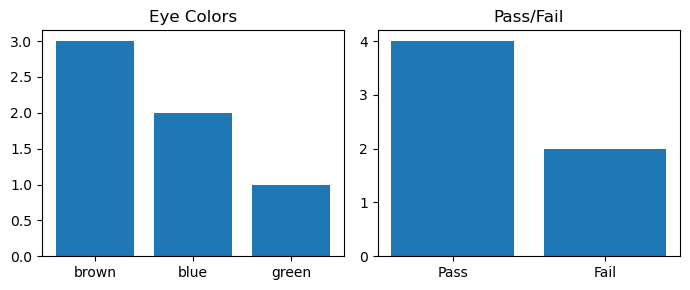

In [5]:
# Nominal example: eye colors
eye_colors = ['brown', 'blue', 'green', 'brown', 'blue', 'brown']
print('Eye color counts:', Counter(eye_colors))

# Ordinal example: satisfaction levels
satisfaction = ['Satisfied', 'Neutral', 'Satisfied', 'Dissatisfied', 'Satisfied']
ord_levels = ['Dissatisfied','Neutral','Satisfied']
s_counts = Counter(satisfaction)
print('\nSatisfaction counts:', s_counts)

# Binary example: pass/fail
results = ['Pass','Pass','Fail','Pass','Pass','Fail']
print('\nPass/Fail counts:', Counter(results))

# plot nominal and binary as side-by-side charts
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
labels = list(Counter(eye_colors).keys())
vals = [Counter(eye_colors)[l] for l in labels]
plt.bar(labels, vals)
plt.title('Eye Colors')

plt.subplot(1,2,2)
labels2 = list(Counter(results).keys())
vals2 = [Counter(results)[l] for l in labels2]
plt.bar(labels2, vals2)
plt.title('Pass/Fail')
plt.tight_layout()
plt.show()

## 7. Measures of Central Tendency: Mean, Median, Mode

Compute and show examples.

In [16]:
data = np.array([2, 3, 3, 5, 8, 10, 11])
mean = data.mean()
median = np.median(data)
mode = Counter(data).most_common(1)[0][0]
print(mode)

3


Data: [ 2  3  3  5  8 10 11]
Mean = 6.0
Median = 5.0
Mode = 3


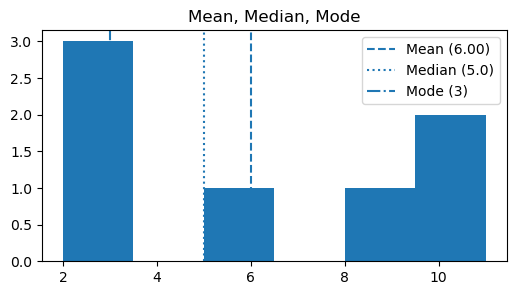

In [6]:
data = np.array([2, 3, 3, 5, 8, 10, 11])
mean = data.mean()
median = np.median(data)
mode = Counter(data).most_common(1)[0][0]

print('Data:', data)
print('Mean =', mean)
print('Median =', median)
print('Mode =', mode)

# Visual: mark mean, median, mode on histogram
plt.figure(figsize=(6,3))
plt.hist(data, bins=6)
plt.axvline(mean, linestyle='--', label=f'Mean ({mean:.2f})')
plt.axvline(median, linestyle=':', label=f'Median ({median})')
plt.axvline(mode, linestyle='-.', label=f'Mode ({mode})')
plt.legend()
plt.title('Mean, Median, Mode')
plt.show()

## 8. Measures of Spread: Range, Variance, Std Dev, IQR

Calculate and visualize boxplot and annotated values.

Range = 9
Variance = 11.428571428571429
Std dev = 3.3806170189140663
Q1 = 3.0 Q2(median)= 5.0 Q3 = 9.0 IQR = 6.0


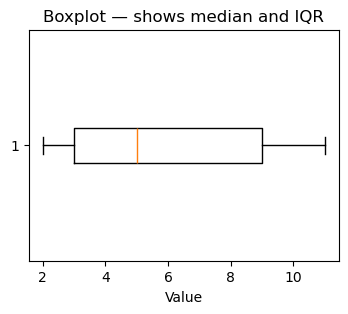

In [7]:
data = np.array([2, 3, 3, 5, 8, 10, 11])
rng = data.max() - data.min()
variance = data.var(ddof=0)
std = data.std(ddof=0)
q1 = np.percentile(data,25)
q2 = np.percentile(data,50)
q3 = np.percentile(data,75)
iqr = q3 - q1

print('Range =', rng)
print('Variance =', variance)
print('Std dev =', std)
print('Q1 =', q1, 'Q2(median)=', q2, 'Q3 =', q3, 'IQR =', iqr)

# Boxplot
plt.figure(figsize=(4,3))
plt.boxplot(data, vert=False)
plt.title('Boxplot — shows median and IQR')
plt.xlabel('Value')
plt.show()

## 9. Shape of Distribution: Normal, Uniform, Skewed, Bimodal

We will generate synthetic samples and plot them to illustrate shapes.

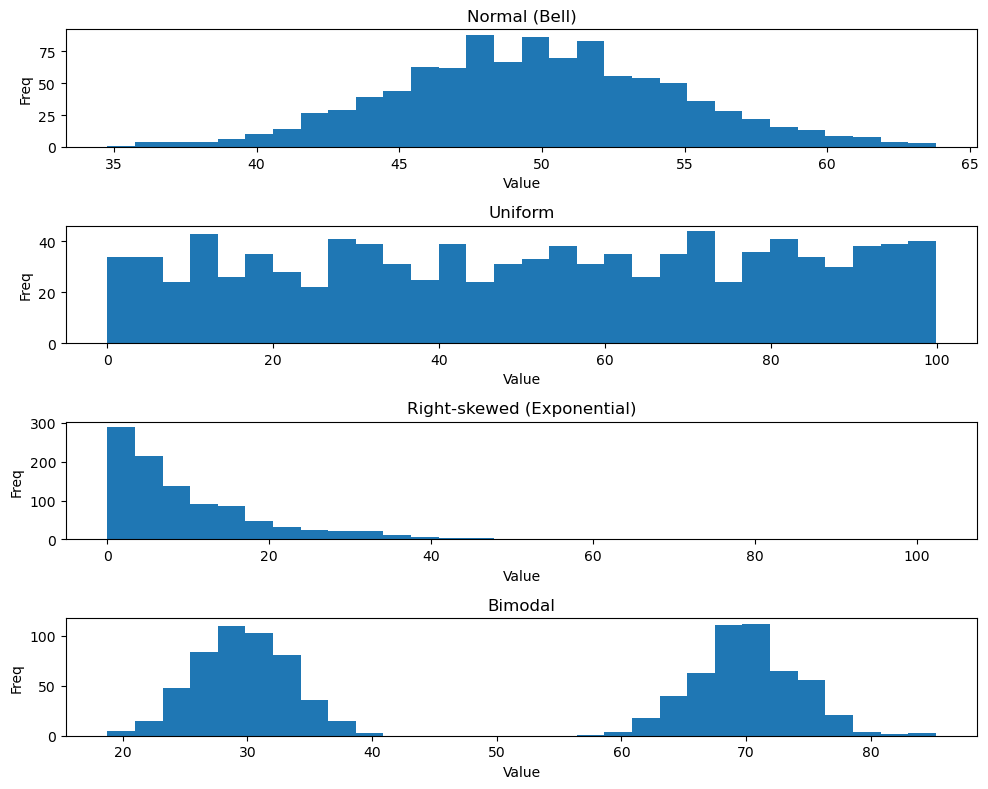

In [8]:
np.random.seed(0)
n = 1000

normal = np.random.normal(loc=50, scale=5, size=n)
uniform = np.random.uniform(low=0, high=100, size=n)
right_skew = np.random.exponential(scale=10, size=n)  # positive skew
bimodal = np.concatenate([np.random.normal(30,4, size=n//2), np.random.normal(70,4, size=n//2)])

datasets = [
    ('Normal (Bell)', normal),
    ('Uniform', uniform),
    ('Right-skewed (Exponential)', right_skew),
    ('Bimodal', bimodal)
]

plt.figure(figsize=(10,8))
for i, (title, arr) in enumerate(datasets, 1):
    plt.subplot(4,1,i)
    plt.hist(arr, bins=30)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Freq')
plt.tight_layout()
plt.show()

## 10. Hands-on: Small dataset analysis (students' example)
We'll create a small dataset, compute common statistics and show plots that help students interpret the dataset.

,age,score,major
0,19,78,CS
1,21,85,EE
2,20,82,CS
3,22,90,ME
4,21,88,CS
5,20,75,EE
6,23,95,CS
7,19,68,ME
8,22,80,CS
9,21,84,EE



Descriptive statistics (numeric):


,age,score
count,10.000000,10.000000
mean,20.800000,82.500000
std,1.316561,7.778175
min,19.000000,68.000000
25%,20.000000,78.500000
50%,21.000000,83.000000
75%,21.750000,87.250000
max,23.000000,95.000000



Mode of major:
CS


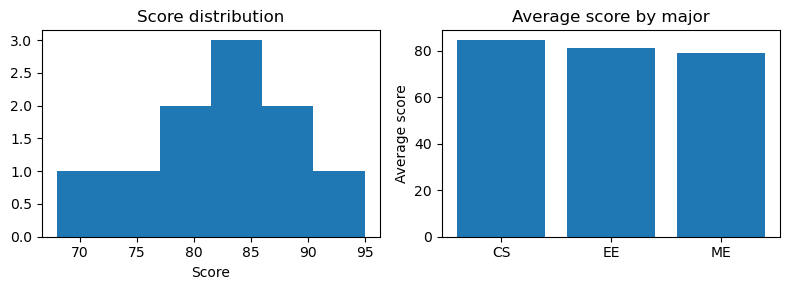

In [9]:
# Create a small DataFrame combining numeric and categorical columns
df = pd.DataFrame({
    'age': [19, 21, 20, 22, 21, 20, 23, 19, 22, 21],
    'score': [78, 85, 82, 90, 88, 75, 95, 68, 80, 84],
    'major': ['CS','EE','CS','ME','CS','EE','CS','ME','CS','EE']
})
display(df)

print('\nDescriptive statistics (numeric):')
display(df[['age','score']].describe())

print('\nMode of major:')
print(df['major'].mode()[0])

# Visuals: score histogram and score by major
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(df['score'], bins=6)
plt.title('Score distribution')
plt.xlabel('Score')

plt.subplot(1,2,2)
groups = df.groupby('major')['score'].mean()
plt.bar(groups.index, groups.values)
plt.title('Average score by major')
plt.ylabel('Average score')
plt.tight_layout()
plt.show()

----
## Assignments

### Assignment 1 (short):
1. Load a CSV of your choice (or create one) and identify whether it's structured or unstructured data. Explain why.
2. For the structured dataset, compute mean, median, mode, variance, and standard deviation for one numeric column and visualize it using a histogram and boxplot.

### Assignment 2 (medium):
1. Collect 50 short text messages (or use existing sample text). Use simple token counts to show the most common words (basic NLP). Plot a bar chart of the top 10 words.
2. For a dataset with categorical variables, compute contingency table (cross-tab) between two categorical columns and visualize using grouped bar chart.

### Assignment 3 (advanced):
1. Create a bimodal-looking dataset by mixing two normal distributions. Fit a Gaussian kernel density estimate and show the density plot. Identify the two modes programmatically.
2. For a real numeric dataset (e.g., house prices or salaries), compute skewness and explain whether mean or median better represents the 'typical' value.

----
Good luck! Run each code cell to see results. Modify the example arrays or DataFrames to experiment.

## Extra: Helpful utility functions (optional)
Small helper to compute mode(s) and display summary.

In [10]:
def modes(arr):
    c = Counter(arr)
    top = c.most_common()
    max_count = top[0][1]
    return [val for val,count in top if count==max_count]

print('Modes of [2,3,3,5,8,10,11] =>', modes([2,3,3,5,8,10,11]))

def summary_stats(arr):
    arr = np.array(arr)
    return {
        'count': arr.size,
        'mean': float(arr.mean()),
        'median': float(np.median(arr)),
        'std': float(arr.std(ddof=0)),
        'min': float(arr.min()),
        'max': float(arr.max())
    }

display(summary_stats([2,3,3,5,8,10,11]))

Modes of [2,3,3,5,8,10,11] => [3]


{'count': 7,
 'mean': 6.0,
 'median': 5.0,
 'std': 3.3806170189140663,
 'min': 2.0,
 'max': 11.0}

### Notes for the instructor

- Encourage students to change random seeds, sample sizes, and distributions to see different behaviors.
- Ask students to bring a small CSV (e.g., class attendance, sales) and reproduce the descriptive statistics and visualizations.